In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score,roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Loading the preprocessed Dataset

df = pd.read_csv('cleaned_placement.csv')

In [3]:
df.drop('gender',axis=1,inplace=True)
df.head()

,ssc_p,hsc_p,degree_p,workex,mba_p,status
0,67.00,91.00,58.00,0,58.80,1
1,79.33,78.33,77.48,1,66.28,1
2,65.00,68.00,64.00,0,57.80,1
3,56.00,52.00,52.00,0,59.43,0
4,85.80,73.60,73.30,0,55.50,1


In [4]:
df.shape

(215, 6)

In [5]:
df['Avg per'] = (df['ssc_p']+df['hsc_p']+df['degree_p']+df['mba_p'])/5
df['Avg per']=df['Avg per'].round(2)

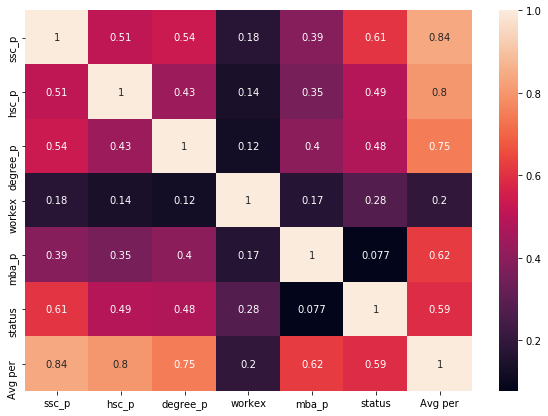

In [7]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

In [8]:
X = df.drop(['status'],axis=1) 
Y = df['status']
print(X.columns) # Features the Model will Train upon.
print(Y.head()) 
# spliting the data into 
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.7,shuffle=True,random_state=2)

Index(['ssc_p', 'hsc_p', 'degree_p', 'workex', 'mba_p', 'Avg per'], dtype='object')
0    1
1    1
2    1
3    0
4    1
Name: status, dtype: int64


In [157]:
# We will use Logistic Regression Classification  model which will fit an S-curve i.e probability curve.

In [158]:
X=X.reindex(columns= ['ssc_p', 'hsc_p', 'degree_p','mba_p','workex','Avg per'])
X.head()

,ssc_p,hsc_p,degree_p,mba_p,workex,Avg per
0,67.00,91.00,58.00,58.80,0,54.96
1,79.33,78.33,77.48,66.28,1,60.28
2,65.00,68.00,64.00,57.80,0,50.96
3,56.00,52.00,52.00,59.43,0,43.89
4,85.80,73.60,73.30,55.50,0,57.64


In [159]:
clf = RandomForestClassifier()

In [160]:
# Training  the Data 
clf.fit(x_train,y_train)

GaussianNB()

In [161]:
# Predicting the value of Y i.e status on the test data.
y_pred = clf.predict(x_test)

In [162]:
#pd.DataFrame({'Y Actual':y_test,'Y Pred':y_pred})

In [163]:
# Confusion Matrix
conf_mat = pd.crosstab(y_test,y_pred)
conf_mat

col_0,0,1
status,,
0,16,7
1,2,40


- Accuracy  0.8615384615384616
- Recall  0.9523809523809523
- Precision  0.851063829787234
- F score   0.898876404494382

In [164]:
accuracy = accuracy_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
print("Accuracy ",accuracy)
print('Recall ',recall)
print('Precision ',precision)
print('F score  ',(2*recall*precision)/(recall+precision))

Accuracy  0.8615384615384616
Recall  0.9523809523809523
Precision  0.851063829787234
F score   0.898876404494382


In [165]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)
fpr,tpr,thresholds

(array([0.        , 0.30434783, 1.        ]),
 array([0.        , 0.95238095, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [166]:
roc_score = roc_auc_score(y_test,y_pred)
roc_score

0.8240165631469979

In [167]:
# Pickle is used to save the model to be used for further use.
pickle.dump(clf,open('Model.pkl','wb'))

In [168]:
X.head()

,ssc_p,hsc_p,degree_p,mba_p,workex,Avg per
0,67.00,91.00,58.00,58.80,0,54.96
1,79.33,78.33,77.48,66.28,1,60.28
2,65.00,68.00,64.00,57.80,0,50.96
3,56.00,52.00,52.00,59.43,0,43.89
4,85.80,73.60,73.30,55.50,0,57.64


In [169]:
model = pickle.load(open('Model.pkl','rb'))

In [170]:
model.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1],
      dtype=int64)

In [171]:
model.score(x_test,y_test)

0.8615384615384616

In [172]:
df.head()

,ssc_p,hsc_p,degree_p,workex,mba_p,status,Avg per
0,67.00,91.00,58.00,0,58.80,1,54.96
1,79.33,78.33,77.48,1,66.28,1,60.28
2,65.00,68.00,64.00,0,57.80,1,50.96
3,56.00,52.00,52.00,0,59.43,0,43.89
4,85.80,73.60,73.30,0,55.50,1,57.64


In [173]:
df.shape

(215, 7)

In [174]:
# Predicting if a user gets the job 
# ssc_p=68,hsc_p=66,degree_p=90,mba_p=85,work_ex=0,etest_p=79